In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_excel("Data_Train.xlsx")

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
# There is only one nan value in route and total stop and amazingly it is in the same row
df[df.Route.isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [7]:
#I drop nan
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


### Here you can see that except price all are the catagorical features so we have to do a lot of feature enginnering

In [10]:
df.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [11]:
df.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [12]:
df.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [13]:
df.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [14]:
df=pd.get_dummies(df,drop_first=True, columns=["Airline","Source","Destination"])

In [15]:
df.shape

(10682, 28)

In [16]:
pd.set_option("display.max_columns",None)
df.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [17]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [18]:
df.replace({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4},inplace=True)

In [19]:
df.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [20]:
df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [21]:
df.Additional_Info.value_counts()/df.shape[0]

No info                         0.781127
In-flight meal not included     0.185546
No check-in baggage included    0.029957
1 Long layover                  0.001779
Change airports                 0.000655
Business class                  0.000374
No Info                         0.000281
1 Short layover                 0.000094
2 Long layover                  0.000094
Red-eye flight                  0.000094
Name: Additional_Info, dtype: float64

### As the percentage of No info in Additional info feature is more than 78 percent so we removw it because it doesnot have as such importance in prediction 

In [22]:
df.drop(columns="Additional_Info",axis=1,inplace=True)

In [23]:
df.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,3897,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,7662,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,13882,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1,6218,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1,13302,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [24]:
df.reset_index(inplace=True)

In [25]:
df.head()

,index,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,3897,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,7662,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,13882,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1,6218,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1,13302,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### A Feature Route and Total_Stops are the same catagorical features so we drop it 

In [26]:
df.drop("Route",axis=1, inplace=True)

In [27]:
df.head()

,index,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24/03/2019,22:20,01:10 22 Mar,2h 50m,0,3897,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,1/05/2019,05:50,13:15,7h 25m,2,7662,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9/06/2019,09:25,04:25 10 Jun,19h,2,13882,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,3,12/05/2019,18:05,23:30,5h 25m,1,6218,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,4,01/03/2019,16:50,21:35,4h 45m,1,13302,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [28]:
df["Journey_Day"]=pd.to_datetime(df["Date_of_Journey"],).dt.day
df["Journey_Month"]=pd.to_datetime(df["Date_of_Journey"]).dt.month

In [29]:
df.head()

,index,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey_Day,Journey_Month
0,0,24/03/2019,22:20,01:10 22 Mar,2h 50m,0,3897,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3
1,1,1/05/2019,05:50,13:15,7h 25m,2,7662,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1
2,2,9/06/2019,09:25,04:25 10 Jun,19h,2,13882,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9
3,3,12/05/2019,18:05,23:30,5h 25m,1,6218,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12
4,4,01/03/2019,16:50,21:35,4h 45m,1,13302,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1


In [30]:
df.drop("Date_of_Journey",axis=1,inplace=True)

In [31]:
df.head()

,index,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey_Day,Journey_Month
0,0,22:20,01:10 22 Mar,2h 50m,0,3897,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3
1,1,05:50,13:15,7h 25m,2,7662,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1
2,2,09:25,04:25 10 Jun,19h,2,13882,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9
3,3,18:05,23:30,5h 25m,1,6218,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12
4,4,16:50,21:35,4h 45m,1,13302,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1


In [32]:
duration_lst=[]
for i in df["Duration"]:
    duration_lst.append(i)

In [33]:
tot_duration_hour=[]
tot_duration_min=[]
for i in duration_lst:
    if len(i.split())!=2:
        if "h" in i:
            h=int((i).split("h")[0])
            tot_duration_hour.append(h*60)
            tot_duration_min.append(0)
        else:
            m=int((i).split("m")[0].split("h")[-1])
            tot_duration_min.append(m)
            tot_duration_hour.append(0)
    else:
        h=int((i).split("h")[0])
        m=int((i).split("m")[0].split("h")[-1])
        tot_duration_hour.append(h*60)
        tot_duration_min.append(m)
    
        

In [34]:
df.head()

,index,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey_Day,Journey_Month
0,0,22:20,01:10 22 Mar,2h 50m,0,3897,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3
1,1,05:50,13:15,7h 25m,2,7662,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1
2,2,09:25,04:25 10 Jun,19h,2,13882,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9
3,3,18:05,23:30,5h 25m,1,6218,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12
4,4,16:50,21:35,4h 45m,1,13302,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1


In [35]:
Duration_in_minutes=[]
for (i,j) in zip(tot_duration_hour,tot_duration_min):
    Duration_in_minutes.append(i+j)
    

In [36]:
len(Duration_in_minutes)

10682

In [37]:
df["Duration_in_minutes"]=Duration_in_minutes

In [38]:
df.head()

,index,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey_Day,Journey_Month,Duration_in_minutes
0,0,22:20,01:10 22 Mar,2h 50m,0,3897,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,170
1,1,05:50,13:15,7h 25m,2,7662,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,445
2,2,09:25,04:25 10 Jun,19h,2,13882,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,1140
3,3,18:05,23:30,5h 25m,1,6218,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,325
4,4,16:50,21:35,4h 45m,1,13302,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,285


In [39]:
df.drop("Duration",axis=1,inplace=True)

In [40]:
df.head()

,index,Dep_Time,Arrival_Time,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey_Day,Journey_Month,Duration_in_minutes
0,0,22:20,01:10 22 Mar,0,3897,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,170
1,1,05:50,13:15,2,7662,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,445
2,2,09:25,04:25 10 Jun,2,13882,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,1140
3,3,18:05,23:30,1,6218,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,325
4,4,16:50,21:35,1,13302,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,285


In [41]:
df["Dep_Time_hour"]=pd.to_datetime(df["Dep_Time"]).dt.hour

In [42]:
df.head()

,index,Dep_Time,Arrival_Time,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey_Day,Journey_Month,Duration_in_minutes,Dep_Time_hour
0,0,22:20,01:10 22 Mar,0,3897,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,170,22
1,1,05:50,13:15,2,7662,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,445,5
2,2,09:25,04:25 10 Jun,2,13882,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,1140,9
3,3,18:05,23:30,1,6218,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,325,18
4,4,16:50,21:35,1,13302,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,285,16


In [43]:
df.drop("Dep_Time",axis=1,inplace=True)

In [44]:
df.head()

,index,Arrival_Time,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey_Day,Journey_Month,Duration_in_minutes,Dep_Time_hour
0,0,01:10 22 Mar,0,3897,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,170,22
1,1,13:15,2,7662,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,445,5
2,2,04:25 10 Jun,2,13882,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,1140,9
3,3,23:30,1,6218,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,325,18
4,4,21:35,1,13302,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,285,16


In [45]:
170/60

2.8333333333333335

In [46]:
df["Arrival_Time_in_Hour"]=pd.to_datetime(df["Arrival_Time"]).dt.hour

In [47]:
df.head()

,index,Arrival_Time,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey_Day,Journey_Month,Duration_in_minutes,Dep_Time_hour,Arrival_Time_in_Hour
0,0,01:10 22 Mar,0,3897,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,170,22,1
1,1,13:15,2,7662,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,445,5,13
2,2,04:25 10 Jun,2,13882,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,1140,9,4
3,3,23:30,1,6218,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,325,18,23
4,4,21:35,1,13302,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,285,16,21


In [48]:
df.drop(["index","Arrival_Time"],axis=1,inplace=True)

In [49]:
df.head()

,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey_Day,Journey_Month,Duration_in_minutes,Dep_Time_hour,Arrival_Time_in_Hour
0,0,3897,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,170,22,1
1,2,7662,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,445,5,13
2,2,13882,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,1140,9,4
3,1,6218,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,325,18,23
4,1,13302,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,285,16,21


In [50]:
df.to_excel("Exploratory Data Analysis of Data_Train.xlsx")

In [51]:
x=df.drop("Price",axis=1)
y=df["Price"]

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=42,test_size=0.3)

In [53]:
x_train.head()

,Total_Stops,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey_Day,Journey_Month,Duration_in_minutes,Dep_Time_hour,Arrival_Time_in_Hour
749,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,27,6,90,10,11
6077,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,21,6,150,17,19
2373,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,27,5,630,15,1
2442,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,9,720,22,10
5402,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,1410,19,19


In [54]:
x_train.columns

Index(['Total_Stops', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Journey_Day',
       'Journey_Month', 'Duration_in_minutes', 'Dep_Time_hour',
       'Arrival_Time_in_Hour'],
      dtype='object')

In [55]:
len(x_train.columns)

26

In [56]:
len([ "Total_Stops_int","Air_India", "GoAir",
       "IndiGo", "Jet_Airways", "Jet_Airways_Business",
       "Multiple_carriers",
       "Multiple_carriers_Premium_economy", "SpiceJet",
       "Trujet","Vistara", "Vistara_Premium_economy",
       "Source_Chennai", "Source_Delhi"," Source_Kolkata", "Source_Mumbai",
       "Destination_Cochin", "Destination_Delhi", "Destination_Hyderabad",
       "Destination_Kolkata", "Destination_New_Delhi", "Journey_Day",
       "Journey_Month", "int(Duration)", "Dep_Time_hour",
       "Arrival_Time_in_Hour"])

26

In [57]:
from sklearn.ensemble import ExtraTreesRegressor

In [58]:
feature_imp=ExtraTreesRegressor().fit(x,y)

In [59]:
feature_imp.feature_importances_

array([2.31823323e-01, 9.59530749e-03, 2.15539036e-03, 1.79328273e-02,
       1.43633754e-01, 6.69052518e-02, 1.83132826e-02, 9.51855667e-04,
       3.50481588e-03, 1.21552561e-04, 5.29693819e-03, 1.14196743e-04,
       4.70418315e-04, 9.20110663e-03, 4.41966942e-03, 7.14586298e-03,
       1.42815832e-02, 1.67517448e-02, 6.60719132e-03, 5.59466024e-04,
       2.32927108e-02, 1.10713218e-01, 8.67244266e-02, 1.39928429e-01,
       3.62523816e-02, 4.33032959e-02])

In [60]:
feature_imp_series=pd.Series(feature_imp.feature_importances_,index=x.columns)

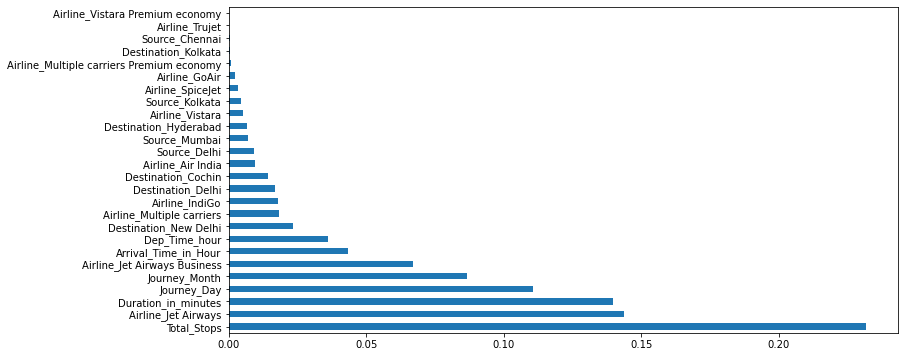

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
feature_imp_series.sort_values().nlargest(26).plot(kind="barh")

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
rf=RandomForestRegressor().fit(x_train,y_train)

In [64]:
pred=rf.predict(x_test)

In [65]:
pred

array([16699.02,  6440.27,  8854.73, ...,  5826.32,  3142.  ,  7039.05])

In [66]:
y_test

6075    16655
3544     4959
9290     9187
5032     3858
2483    12898
        ...  
7917    16263
5858    10844
2689     5000
4486     3100
7877     6734
Name: Price, Length: 3205, dtype: int64

In [67]:
rf.score(x_train,y_train)

0.9531912404853207

In [68]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [69]:
mean_squared_error(y_test,pred)

3904791.550263928

In [70]:
np.sqrt(mean_squared_error(y_test,pred))

1976.0545413181105

In [71]:
mean_absolute_error(y_test,pred)

1216.3193304896265

In [72]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [73]:
from sklearn.model_selection import RandomizedSearchCV

In [74]:
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1,scoring="neg_mean_squared_error")

In [75]:
# rf_random.fit(x_train,y_train)

In [76]:
# rf_random.best_params_

In [77]:
# rf_random.best_score_

In [79]:
rf=RandomForestRegressor(n_estimators= 400,
 min_samples_split= 10,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= 60,
 bootstrap= False).fit(x_train,y_train)

In [80]:
y_pred=rf.predict(x_test)

In [81]:
mean_squared_error(y_test,y_pred=y_pred)

3396007.323008817

In [82]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1234.0644779970703
MSE: 3396007.323008817
RMSE: 1842.8259068639168


In [83]:
import pickle
pickle.dump( rf, open( "Random Forest Airlines Fare Predictions.pkl", "wb" ) )

In [84]:
x_train

,Total_Stops,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey_Day,Journey_Month,Duration_in_minutes,Dep_Time_hour,Arrival_Time_in_Hour
749,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,27,6,90,10,11
6077,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,21,6,150,17,19
2373,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,27,5,630,15,1
2442,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,9,720,22,10
5402,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,1410,19,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,27,3,1165,9,4
5191,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,9,400,14,20
5390,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,15,5,760,12,1
860,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,3,165,0,3
